In [4]:
### Basic Lib for Machine Learning
import numpy as np
import pandas as pd

### Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

### For matrix factorization (SVD)
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

import warnings
warnings.filterwarnings('ignore')

import csv

titles = []
with open('../data/netflix-prize-data/movie_titles.csv', encoding='latin-1') as f:
    reader = csv.reader(f)
    for row in reader:
        try:
            movie_id = int(row[0])
            year = int(row[1])
            title = ",".join(row[2:])
            titles.append([movie_id, year, title])
        except:
            continue

titles_df = pd.DataFrame(titles, columns=['movie_id', 'year', 'title'])

ratings_list = []
with open('../data/netflix-prize-data/combined_data_1.txt', 'r') as file:
    movie_id = None
    for line in file:
        line = line.strip()
        if line.endswith(':'):
            movie_id = int(line[:-1])
        else:
            user_id, rating, date = line.split(',')
            ratings_list.append([int(user_id), movie_id, int(rating), date])

ratings_df = pd.DataFrame(ratings_list, columns=['user_id','movie_id','rating','date'])

df = pd.merge(ratings_df, titles_df, on='movie_id')

print("Ratings shape:", ratings_df.shape)
print("Titles shape:", titles_df.shape)
print("Final merged shape:", df.shape)

Ratings shape: (24053764, 4)
Titles shape: (17763, 3)
Final merged shape: (24053575, 6)


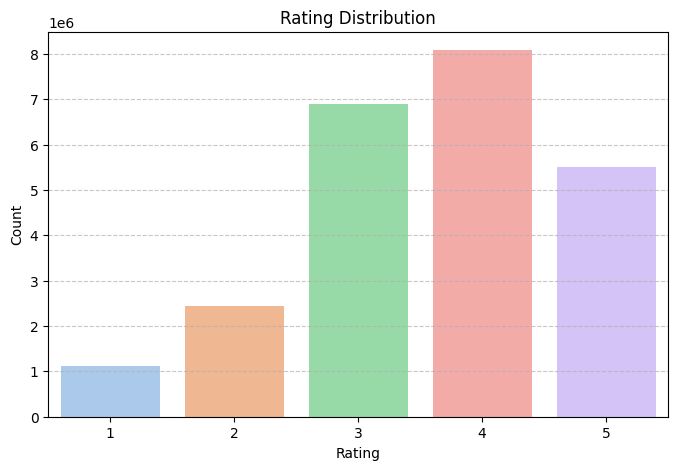

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df, palette='pastel')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.show()

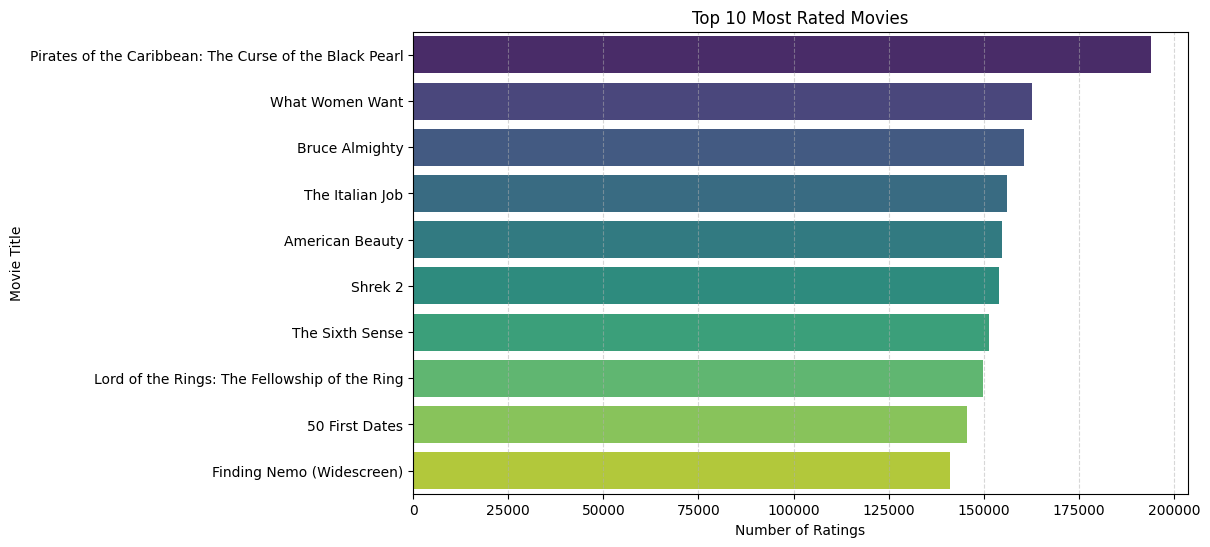

In [7]:
top_movies = df['title'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_movies.index, x=top_movies.values, palette='viridis')

plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

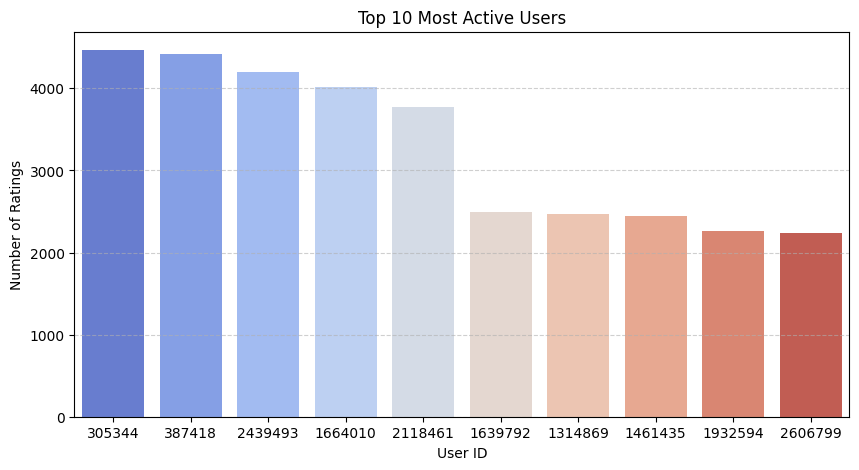

In [8]:
top_users = df['user_id'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_users.index.astype(str), y=top_users.values, palette='coolwarm')
plt.title('Top 10 Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
top_users = df['user_id'].value_counts().head(2000).index
top_users ### User ID

Index([ 305344,  387418, 2439493, 1664010, 2118461, 1639792, 1314869, 1461435,
       1932594, 2606799,
       ...
       2535229,  392651,   54870,  633570, 1746056,  620714, 2442028, 1225914,
        633722,  383404],
      dtype='int64', name='user_id', length=2000)

In [10]:
subset_df = df[df['user_id'].isin(top_users)]

In [ ]:
user_movie_matrix = subset_df.pivot_table(index='user_id', columns='title', values='rating')

### We are not going to fill in the NaN elements.